In [111]:
%cd /home/kenji/Projects/BasicProjects/KNN_CarClassifier

/home/kenji/Projects/BasicProjects/KNN_CarClassifier


In [112]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [113]:
## 1. Data
### 1.1 Load Data
data = pd.read_csv('Data/car.data')

# source: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [114]:
### 1.2 Inspect Data
#### 1.2.1 Inspect Table
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 712.2 KB


,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [115]:
data.shape

(1728, 7)

In [116]:
#check for dupes
print(len(data[data.duplicated()]))

#check for missing
print(data[data.isnull().any(axis=1)])
print(data.isna().sum())

0
Empty DataFrame
Columns: [buying, maint, door, persons, lug_boot, safety, class]
Index: []
buying      0
maint       0
door        0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [117]:
data.dtypes

buying      object
maint       object
door        object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [118]:
data.nunique()

buying      4
maint       4
door        5
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [119]:
#### 1.2.2 Inspect and Modify Columns
data.columns
# already formatted lower but 'class' is a problematic name.
data = data.rename({'class': 'car_class'}, axis=1)

In [120]:
for i in data.columns:
    print(data[i].value_counts())


med      432
vhigh    432
low      432
high     432
Name: buying, dtype: int64
med      432
vhigh    432
low      432
high     432
Name: maint, dtype: int64
4        432
2        432
3        432
5more    405
more      27
Name: door, dtype: int64
4       576
2       576
more    576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: car_class, dtype: int64


In [121]:
for i in data.columns:
    print(i)
    print(data[i].unique())

buying
['vhigh' 'high' 'med' 'low']
maint
['vhigh' 'high' 'med' 'low']
door
['2' '3' '4' '5more' 'more']
persons
['2' '4' 'more']
lug_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
car_class
['unacc' 'acc' 'vgood' 'good']


In [122]:
data.head()
# While door and persons appear to be numeric variables, they are in fact categorical. The rest are and can be treated as strings for possible processing optimization prior to being transformed.

,buying,maint,door,persons,lug_boot,safety,car_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [123]:
data.door.value_counts()
# note the clearly categorical values.

4        432
2        432
3        432
5more    405
more      27
Name: door, dtype: int64

In [124]:
#strings = ['buying','maint','lug_boot','safety','class']
# nope, they're all categorical and can be converted to string type.
for i in data.columns:
    data[i] = data[i].astype('string')

data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   string
 1   maint      1728 non-null   string
 2   door       1728 non-null   string
 3   persons    1728 non-null   string
 4   lug_boot   1728 non-null   string
 5   safety     1728 non-null   string
 6   car_class  1728 non-null   string
dtypes: string(7)
memory usage: 712.2 KB


In [125]:
### 1.3 EDA: Initial Summary Stats
data.describe(include='all')

,buying,maint,door,persons,lug_boot,safety,car_class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,5,3,3,3,4
top,high,high,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


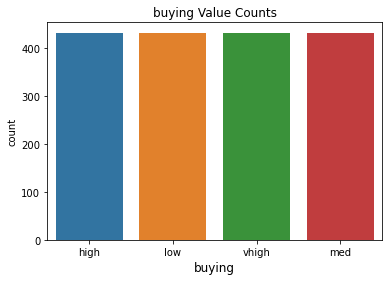

high     432
low      432
vhigh    432
med      432
Name: buying, dtype: Int64


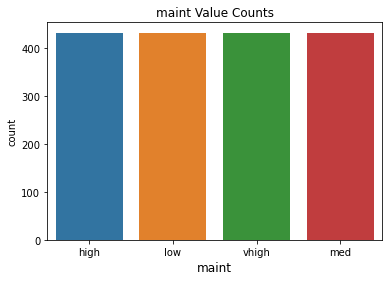

high     432
low      432
vhigh    432
med      432
Name: maint, dtype: Int64


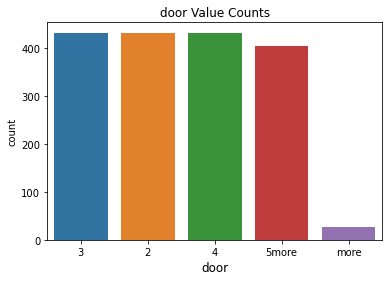

3        432
2        432
4        432
5more    405
more      27
Name: door, dtype: Int64


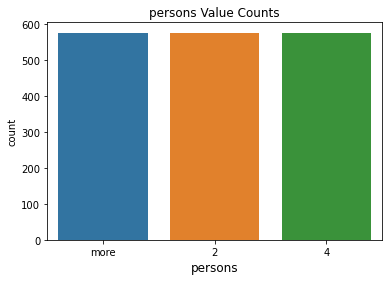

more    576
2       576
4       576
Name: persons, dtype: Int64


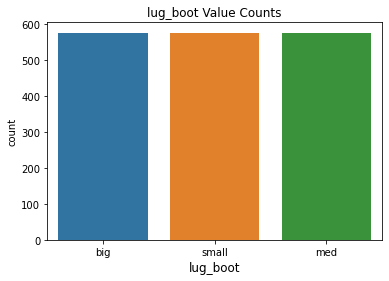

big      576
small    576
med      576
Name: lug_boot, dtype: Int64


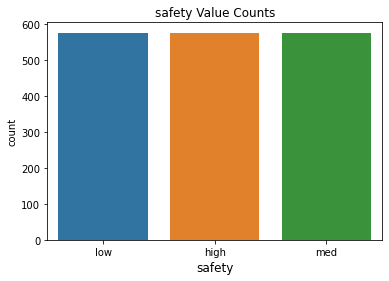

low     576
high    576
med     576
Name: safety, dtype: Int64


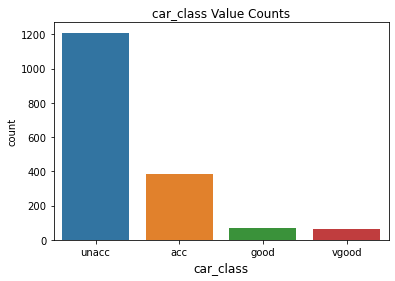

unacc    1210
acc       384
good       69
vgood      65
Name: car_class, dtype: Int64


<Figure size 432x288 with 0 Axes>

In [126]:
### 1.4 EDA: Initial Visualization of Summary Stats
# list of all column headers


for column in data.columns.tolist():
  
  
  sns.countplot(x=data[column],order=data[column].value_counts().index)
  plt.title(column+' Value Counts')
  plt.xticks(rotation=0,fontsize=10)
  plt.xlabel(column,fontsize=12)
  plt.show()
  plt.clf()
  print(data[column].value_counts())

In [127]:
### 1.5 Observations

# Column            Observation
#   buying: 
#   maint
#   door
#   persons
#   lug_boot
#   safety
#   class

In [128]:
## 2. Preprocessing
### 2.1 Reinspect Data
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   string
 1   maint      1728 non-null   string
 2   door       1728 non-null   string
 3   persons    1728 non-null   string
 4   lug_boot   1728 non-null   string
 5   safety     1728 non-null   string
 6   car_class  1728 non-null   string
dtypes: string(7)
memory usage: 712.2 KB


,buying,maint,door,persons,lug_boot,safety,car_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [129]:
### 2.2 Diagnose Data
# This data is extremely clean, which is great for a simple project. ALthough the mostly even splits throughout the data are initially concerning, there doesn't seem to be any significant overlap, at this time.

In [130]:
### 2.3 Data Wrangling
# Since I'd like this to remain a simple KNN project I will need to generate a new column with a target based on a selection of feature values.
# Within the scope of a use case, I may be interested in a low maintenance, relatively safe, and I've got expensive tastes so 

In [131]:
# changing x gives me a quick look at the values in each variable. Turns out, everything is ordinal!
x = 'car_class'
data[x].unique()

<StringArray>
['unacc', 'acc', 'vgood', 'good']
Length: 4, dtype: string

In [132]:
# Lambda row functions are powerful.
# With the function below I'm creating a new column, for the dependent variable,
# bosed on a specific combination of row values.

maint = 'low'
safety = 'med'
car_class = 'acc'

def target(row):
    """Applied as a lambda function over each row so each row's columns
        can be individually checked for values.
        

    Args:
        row (DataFrame row): The row parameter represents a row in the DataFrame.

    Returns:
        float: numeric representation of positive binary label
    """
    if row['maint'] == maint:
        if (row['safety'] == safety):
            if row['car_class'] == car_class:
                return 1

data['target'] = data.apply( lambda row : target(row), axis = 1)
data.target.fillna(0, inplace=True)
data

,buying,maint,door,persons,lug_boot,safety,car_class,target
0,vhigh,vhigh,2,2,small,low,unacc,0.0
1,vhigh,vhigh,2,2,small,med,unacc,0.0
2,vhigh,vhigh,2,2,small,high,unacc,0.0
3,vhigh,vhigh,2,2,med,low,unacc,0.0
4,vhigh,vhigh,2,2,med,med,unacc,0.0
...,...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good,0.0
1724,low,low,5more,more,med,high,vgood,0.0
1725,low,low,5more,more,big,low,unacc,0.0
1726,low,low,5more,more,big,med,good,0.0


In [168]:
print(len(data))
print(len(data[data.target==1]))
data[data.target==1]

1728
46


,buying,maint,door,persons,lug_boot,safety,car_class,target
340,1.341641,-1.341641,-1.187658,0.000000,1.224745,0.0,0.790116,1.0
349,1.341641,-1.341641,-1.187658,1.224745,1.224745,0.0,0.790116,1.0
367,1.341641,-1.341641,-0.502882,0.000000,1.224745,0.0,0.790116,1.0
373,1.341641,-1.341641,-0.502882,1.224745,0.000000,0.0,0.790116,1.0
376,1.341641,-1.341641,-0.502882,1.224745,1.224745,0.0,0.790116,1.0
391,1.341641,-1.341641,0.181894,0.000000,0.000000,0.0,0.790116,1.0
394,1.341641,-1.341641,0.181894,0.000000,1.224745,0.0,0.790116,1.0
400,1.341641,-1.341641,0.181894,1.224745,0.000000,0.0,0.790116,1.0
403,1.341641,-1.341641,0.181894,1.224745,1.224745,0.0,0.790116,1.0
418,1.341641,-1.341641,1.551446,0.000000,0.000000,0.0,0.790116,1.0


In [134]:
### 2.4 Encoding
# For this project I'm keeping ML and train/test splits out of at least the transformation/scaling pipeline.
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer


nominal_cat_features = ['mjob']
ordinal_cat_features = ['age']
scaler_features = list(data.columns)


ordinal_cat_encoder = Pipeline(steps=[
    ('ord_cat',OrdinalEncoder())
])

nominal_encoder = Pipeline(steps=[
    ('ohe', OneHotEncoder())
])

scaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

minmax_scalar_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('ord_cat1', OrdinalEncoder(categories=[['low','med','high','vhigh']]),['buying']),
        ('ord_cat2', OrdinalEncoder(categories=[['low','med','high','vhigh']]),['maint']),
        ('ord_cat3', OrdinalEncoder(categories=[['2', '3', '4', 'more', '5more']]),['door']),
        ('ord_cat5', OrdinalEncoder(categories=[['2', '4', 'more']]),['persons']),
        ('ord_cat4', OrdinalEncoder(categories=[['small', 'med', 'big']]),['lug_boot']),
        ('ord_cat6', OrdinalEncoder(categories=[['low','med','high']]),['safety']),
        ('ord_cat7', OrdinalEncoder(categories=[['unacc','acc','good','vgood']]),['car_class']),
        #(OrdinalEncoder(categories=['low', 'med', 'high', 'vhigh']), ['buying'])
        #('ohe', nominal_encoder, nominal_cat_features)
        #('scaler', scaler_transformer,scaler_features)
        #('mmax_scaler', minmax_scalar_transformer,scaler_features),

    ],remainder='passthrough'
)



transformer = Pipeline(steps=[('preprocessor', preprocessor)])
df_transformed = pd.DataFrame(transformer.fit_transform(data), columns=data.columns)
data = df_transformed
data

,buying,maint,door,persons,lug_boot,safety,car_class,target
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1723,0.0,0.0,4.0,2.0,1.0,1.0,2.0,0.0
1724,0.0,0.0,4.0,2.0,1.0,2.0,3.0,0.0
1725,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0
1726,0.0,0.0,4.0,2.0,2.0,1.0,2.0,0.0


In [135]:
### 2.5 Transform Data
from sklearn.preprocessing import StandardScaler
# standardize data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data.drop('target',axis=1))
scaled_data = pd.DataFrame(standardized_data, columns=data.columns[:-1])
scaled_data['target'] = data.target
data = scaled_data
data

,buying,maint,door,persons,lug_boot,safety,car_class,target
0,1.341641,1.341641,-1.187658,-1.224745,-1.224745,-1.224745,-0.560349,0.0
1,1.341641,1.341641,-1.187658,-1.224745,-1.224745,0.000000,-0.560349,0.0
2,1.341641,1.341641,-1.187658,-1.224745,-1.224745,1.224745,-0.560349,0.0
3,1.341641,1.341641,-1.187658,-1.224745,0.000000,-1.224745,-0.560349,0.0
4,1.341641,1.341641,-1.187658,-1.224745,0.000000,0.000000,-0.560349,0.0
...,...,...,...,...,...,...,...,...
1723,-1.341641,-1.341641,1.551446,1.224745,0.000000,0.000000,2.140581,0.0
1724,-1.341641,-1.341641,1.551446,1.224745,0.000000,1.224745,3.491047,0.0
1725,-1.341641,-1.341641,1.551446,1.224745,1.224745,-1.224745,-0.560349,0.0
1726,-1.341641,-1.341641,1.551446,1.224745,1.224745,0.000000,2.140581,0.0


In [136]:
## 3. EDA: Summary Stats
### 3.1 Descriptive Stats
data.describe()

,buying,maint,door,persons,lug_boot,safety,car_class,target
count,1728.000000,1728.000000,1.728000e+03,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.000000,0.000000,1.583096e-16,0.000000,0.000000,0.000000,0.000000,0.026620
std,1.000289,1.000289,1.000289e+00,1.000289,1.000289,1.000289,1.000289,0.161018
min,-1.341641,-1.341641,-1.187658e+00,-1.224745,-1.224745,-1.224745,-0.560349,0.000000
25%,-0.670820,-0.670820,-6.740764e-01,-1.224745,-1.224745,-1.224745,-0.560349,0.000000
50%,0.000000,0.000000,-1.604944e-01,0.000000,0.000000,0.000000,-0.560349,0.000000
75%,0.670820,0.670820,3.530876e-01,1.224745,1.224745,1.224745,0.790116,0.000000
max,1.341641,1.341641,1.551446e+00,1.224745,1.224745,1.224745,3.491047,1.000000


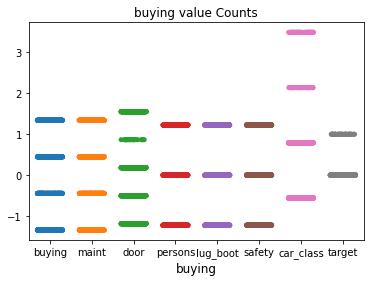

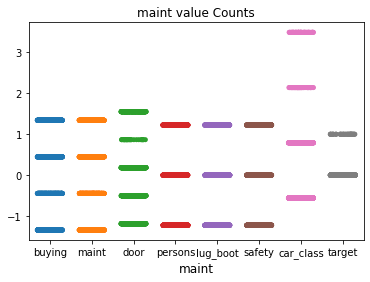

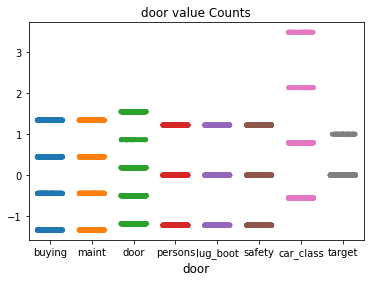

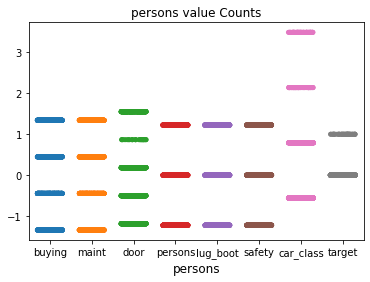

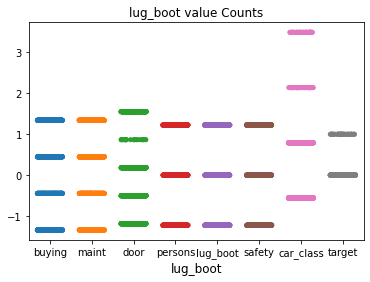

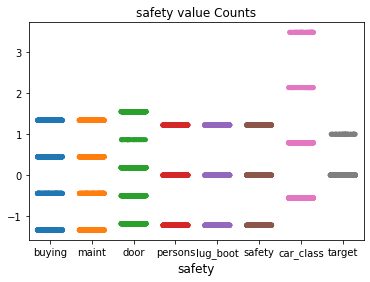

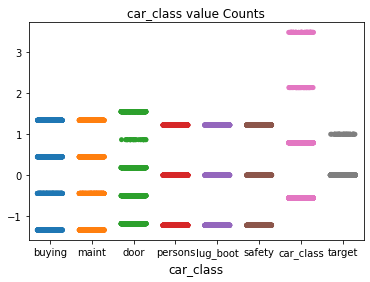

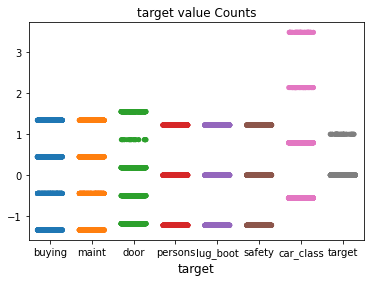

<Figure size 432x288 with 0 Axes>

In [137]:
for column in data.columns:
  sns.stripplot(data=data,jitter=.3)
  plt.title(column+' value Counts')
  plt.xticks(rotation=0,fontsize=10)
  plt.xlabel(column,fontsize=12)
  plt.show()
  plt.clf()

In [169]:
## 5.1 Select Features
## 5.2 Select Target
target = 'target'
y_data = data[target]
data[target] = y_data



## 5.3 Split Data
x = data.drop([target],axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [170]:
## 6. Modeling
## 6.1 Initialize Model and Set Parameters
KNN = KNeighborsClassifier(n_neighbors=5)

## 6.2 Fit Data to Train Model
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [171]:

## 6.2 Evaluate Model Performance
y_pred = KNN.predict(x_test)
probabilities = KNN.predict_proba(x_test)

def evaluate(model,y_pred,y_test):
    """Evaluation function for use with SKlearn algorithms.

    Args:
        model (string): Determines which scoring merics to apply.
        y_pred (_type_): Classifier predictions.
        y_test (_type_): Actual Values
    """
    if model == 'linreg':
        print(linreg.score(x_test,y_test))
        print(linreg.coef_)
        y_pred = linreg.predict(x_test)
        #print(f'The Intercept (grade) is {linreg.intercept_}')
        for i in range(len(y_pred)):
            print(f'Predicted: {round(y_pred[i])}\t Actual: {y_test[i]} \t Data {x_test[i]}')
    if model == 'KNN':
        print(KNN.score(x_test,y_test))
        y_pred = y_pred.tolist()
        y_test = y_test.tolist()
        classes = ['unacc','acc','good','vgood']
        for i in range(len(y_pred)):
            print(f'Pred: {y_pred[i]}\t Actual: {y_test[i]} \t Probability: {probabilities[i]}')
    return

In [172]:
print(evaluate('KNN',y_pred,y_test))

1.0
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 1.0	 Actual: 1.0 	 Probability: [0.4 0.6]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Probability: [1. 0.]
Pred: 0.0	 Actual: 0.0 	 Pro

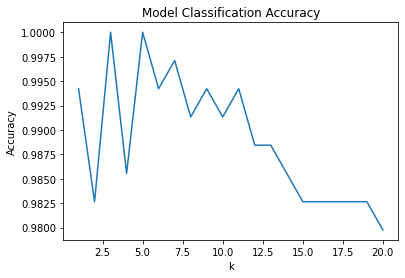

In [173]:
accuracies = []
for k in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    accuracies.append(KNN.score(x_test,y_test))
    highest = max(accuracies)


k_list = range(1,21)
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Classification Accuracy')
plt.show()

In [162]:
#TODO get and possibly plot distances
#TODO apply gridsearch?
#TODO make probabilities more interpretable
#TODO make eval function.. better
#TODO add more EDA graphs for groupings and variable comparisons (stats)
#TODO can this be self-tuning w/gridsearch?

#TODO ### 1.5 Observations
#TODO chi square!

In [163]:
# DENOTES
# May.4
# something interesting that just happened is that I realized, a little latr, that using car_class would have created a multilabel problem.
    # I found this, might be worth looking into later. http://scikit.ml/api/skmultilearn.adapt.mlknn.html
    # For now, the problem has (thankfully) evolved into a simpler direction where I compose a target, based on what features I might wat to see in a car.
